# Visualizations

This notebook contains different visualizations.

In [1]:
import numpy as np

%matplotlib widget

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
x = np.linspace(0, 4*np.pi, 200)
y = np.linspace(0, 6*np.pi, 300)
x, y = np.meshgrid(x, y)
z = np.sin(x) * np.sin(y)

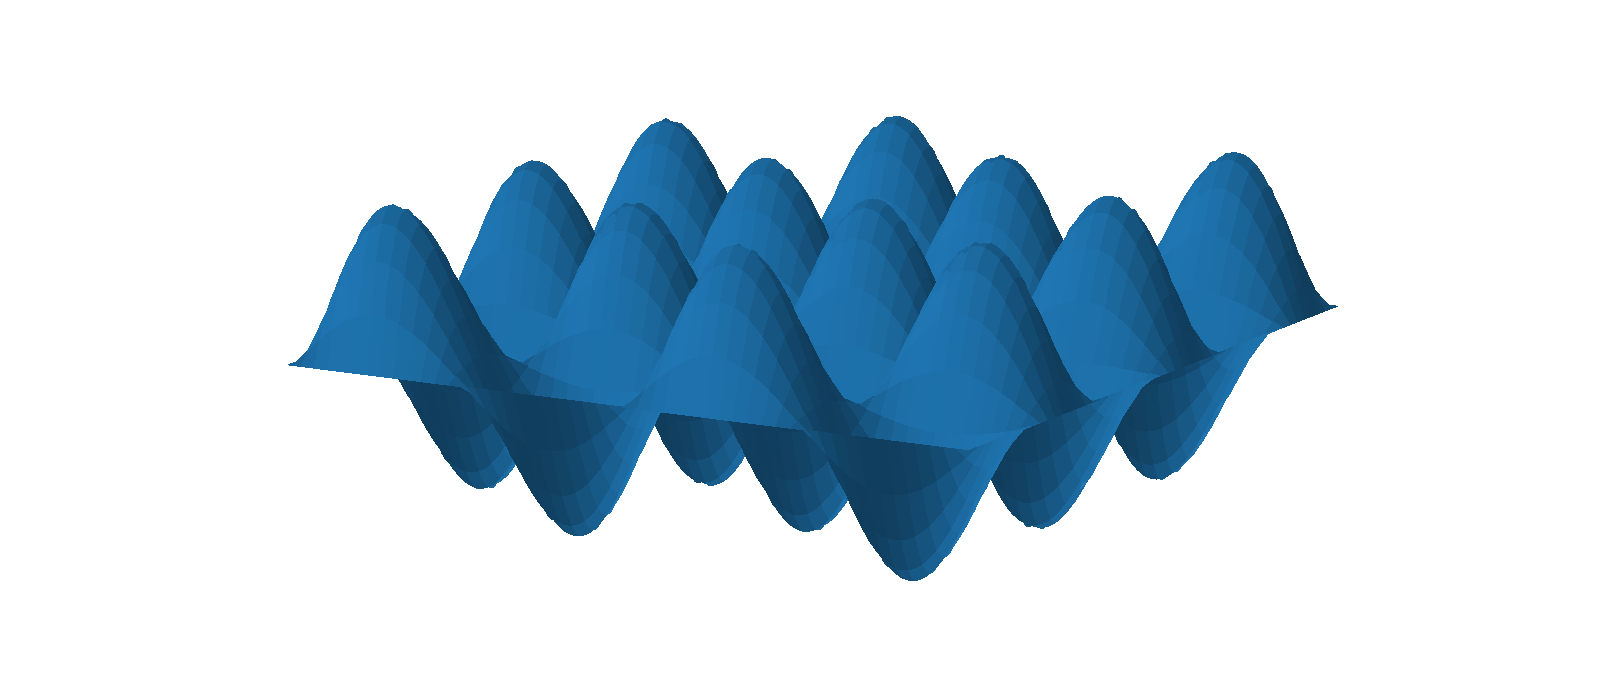

In [19]:
fig = plt.figure(figsize=(14, 6))

ax = fig.gca(projection='3d')
ax.set_axis_off()
ax.plot_surface(x, y, z, antialiased=False)
#ax.view_init(-40, 30)
fig.savefig('../images/optlat/default.pdf', bbox_inches='tight')

plt.show()

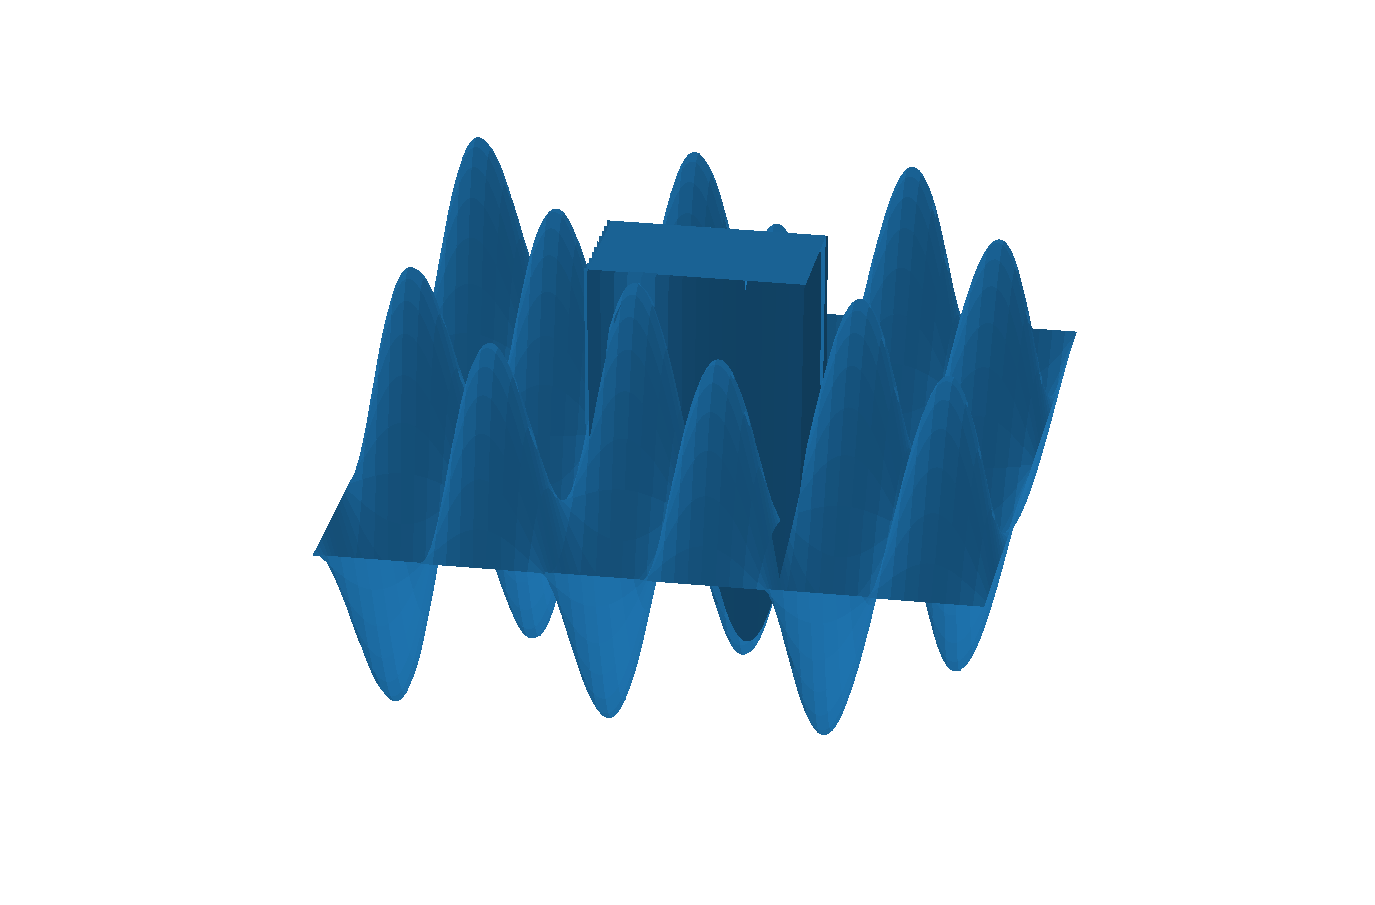

In [20]:
fig = plt.figure(figsize=(12, 8))

z[100:200, 80:120] = 1.0

ax = fig.gca(projection='3d')
ax.set_axis_off()
ax.plot_surface(x, y, z, antialiased=False)
ax.view_init(40, 10)

fig.savefig('../images/optlat/well.pdf', bbox_inches='tight')

plt.show()

In [12]:
z.shape

(300, 200)

In [21]:
from PIL import Image

In [25]:
img = np.array(Image.open('../images/camera/dot.tif'))

In [28]:
img.shape

(1216, 1936)

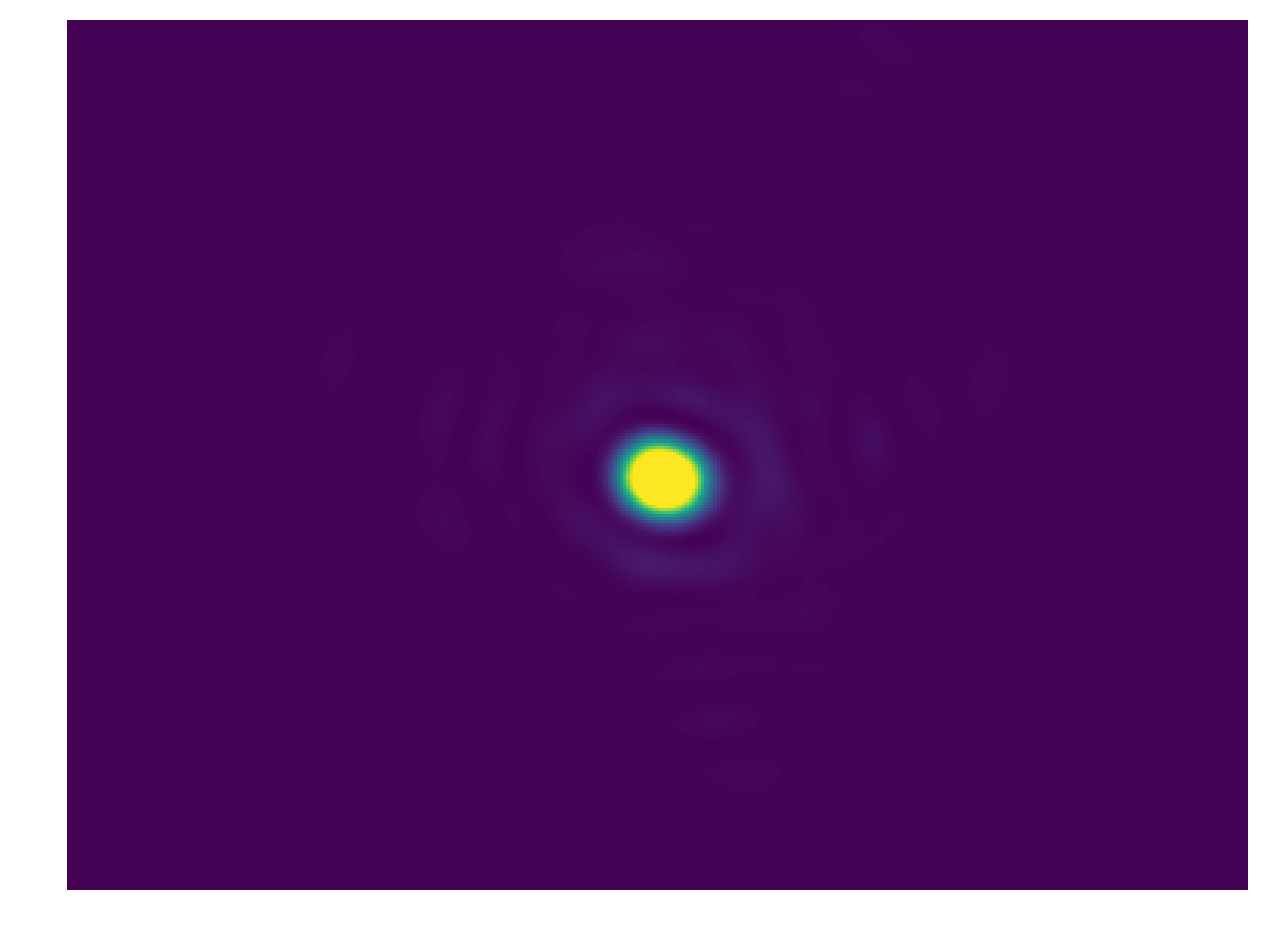

In [46]:
fig = plt.figure(figsize=(12, 8))

plt.axis('off')
plt.imshow(img[520:800, 870:1250])

fig.savefig('../images/camera/profile2d.pdf', bbox_inches='tight')

In [74]:
det = img[520:800, 870:1250]
x = det[:, det.shape[1] // 2]
x = x / x.max()
y = det[det.shape[0] // 2]
y = y / y.max()

In [61]:
def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma))

In [70]:
from scipy import optimize

poptH, _ = optimize.curve_fit(gaussian, np.linspace(0, len(x), len(x)), x, p0=[1, 150, 10])
poptV, _ = optimize.curve_fit(gaussian, np.linspace(0, len(y), len(y)), y, p0=[1, 190, 10])

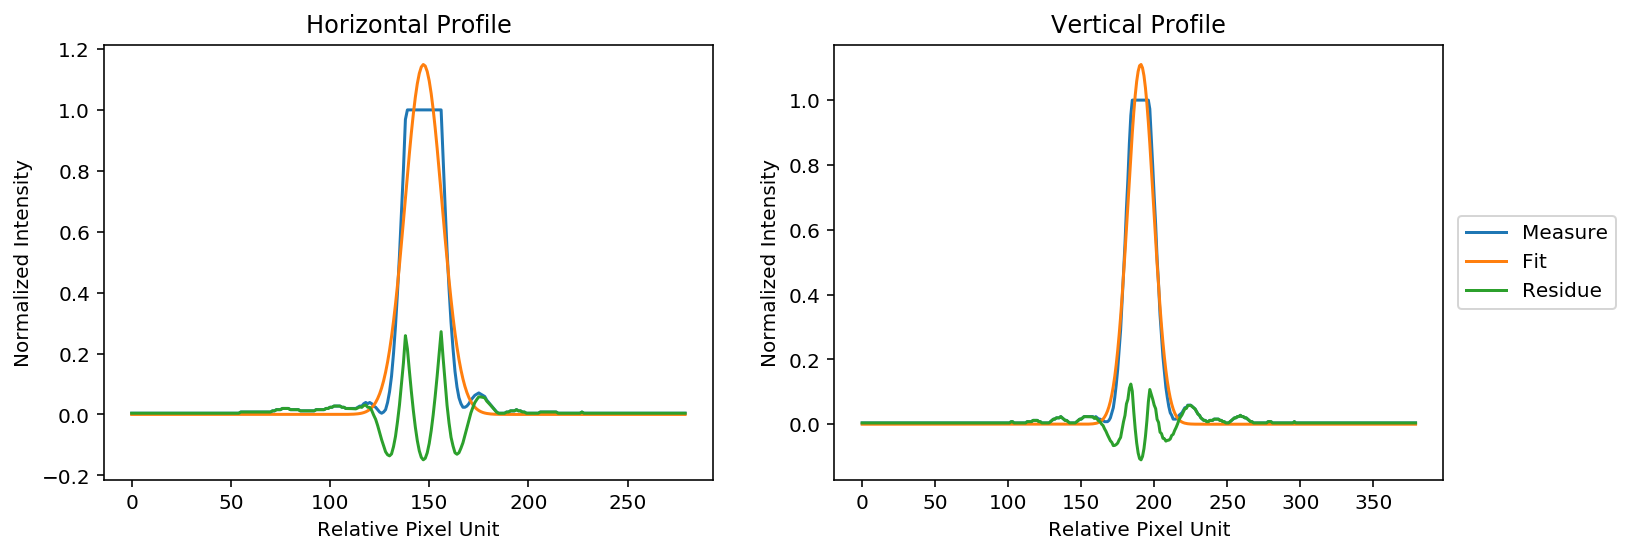

In [87]:
fig = plt.figure(figsize=(12, 4))

u = np.linspace(0, len(x), len(x))
v = np.linspace(0, len(y), len(y))

X = gaussian(u, *poptH)
Y = gaussian(v, *poptV)

plt.subplot(121)
plt.title('Horizontal Profile')
plt.xlabel('Relative Pixel Unit')
plt.ylabel('Normalized Intensity')
plt.plot(x, label='Measure')
plt.plot(X, label='Fit')
plt.plot(x-X, label='Residue')

plt.subplot(122)
plt.title('Vertical Profile')
plt.xlabel('Relative Pixel Unit')
plt.ylabel('Normalized Intensity')
plt.plot(y, label='Measure')
plt.plot(Y, label='Fit')
plt.plot(y-Y, label='Residue')

plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.show()

fig.savefig('../images/camera/profile1d.pdf', bbox_inches='tight')

In [63]:
len(np.linspace(0, len(x), 200)), len(x)

(200, 280)

In [69]:
poptH

array([  1.14920825, 147.64956729,  86.99641242])